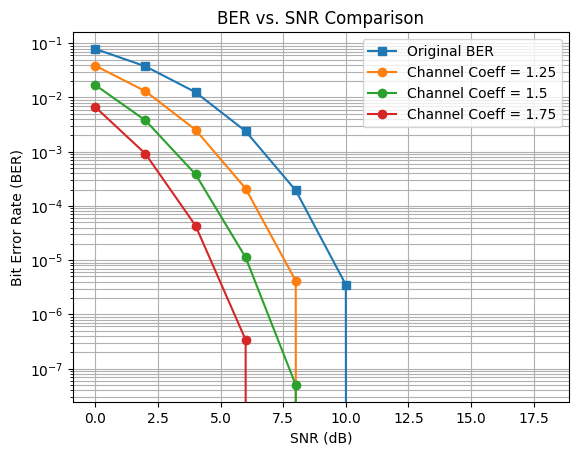

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_bits = 100000000
power = 10**-7  # received power
voltage = np.sqrt(power)  # Voltage representation
amplitude = voltage  # Detection threshold at half the voltage
snr_db_values = np.arange(0, 20, 2)  # SNR in dB steps of 2

# Store BER values for original case
original_ber_results = []

for snr_db in snr_db_values:
    snr_linear = 10**(snr_db / 10)  # Convert SNR from dB to linear
    noise_var = power / snr_linear  # Calculate noise variance

    bits = np.random.randint(0, 2, num_bits)
    transmitted_signal = np.where(bits == 0, amplitude, -amplitude)

    noise_real = (1 / np.sqrt(2)) * np.random.normal(0, np.sqrt(noise_var), num_bits)
    noise_imag = (1 / np.sqrt(2)) * np.random.normal(0, np.sqrt(noise_var), num_bits)
    noise = noise_real + 1j * noise_imag  # Complex Gaussian noise

    received_signal = transmitted_signal + noise
    received_signal_real = np.real(received_signal)

    decoded_bits = (received_signal_real < 0).astype(int)
    bit_errors = np.sum(decoded_bits != bits)
    ber = bit_errors / num_bits
    original_ber_results.append(ber)

# Define channel coefficients and store BER results
channel_coefficients = [1.25, 1.5, 1.75]
ber_results = {h: [] for h in channel_coefficients}# creates a dictionary for  Bit Error Rate (BER) values for each corresponding channel coefficient.
# print(ber_results)
# input()
for h in channel_coefficients:
    for snr_db in snr_db_values:
        snr_linear = 10**(snr_db / 10)  # Convert SNR from dB to linear
        noise_var = power / snr_linear  # Calculate noise variance

        bits = np.random.randint(0, 2, num_bits)
        transmitted_signal = np.where(bits == 0, amplitude, -amplitude)

        received_signal = h * transmitted_signal  # Apply channel effect

        noise_real = (1 / np.sqrt(2)) * np.random.normal(0, np.sqrt(noise_var), num_bits)
        noise_imag = (1 / np.sqrt(2)) * np.random.normal(0, np.sqrt(noise_var), num_bits)
        noise = noise_real + 1j * noise_imag

        received_signal =received_signal+ noise
        received_signal = (received_signal / (h + 1e-10))**-1  # Equalization to avoid division by zero
        received_signal_real = np.real(received_signal)

        decoded_bits = (received_signal_real < 0).astype(int)
        bit_errors = np.sum(decoded_bits != bits)
        ber = bit_errors / num_bits
        ber_results[h].append(ber)

# Plot BER vs. SNR for all cases
plt.figure()
plt.semilogy(snr_db_values, original_ber_results, marker='s', linestyle='-', label="Original BER")

for h, bers in ber_results.items():
    plt.semilogy(snr_db_values, bers, marker='o', linestyle='-', label=f"Channel Coeff = {h}")

plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title("BER vs. SNR Comparison")
plt.legend()
plt.grid(True, which='both')
plt.show()


